In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import fetch_lfw_people

In [3]:
faces = fetch_lfw_people(resize=0.4,min_faces_per_person=70)

In [44]:
data = DataFrame(faces.data)
target = faces.target
images = faces.images
target_names = faces.target_names

In [45]:
data

,0,1,2,3,4,5,6,7,8,9,...,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849
0,57.000000,60.333332,73.333336,96.000000,116.000000,127.666664,126.000000,121.666664,123.333336,126.666664,...,16.000000,17.333334,18.666666,18.333334,18.666666,18.333334,15.333333,20.333334,22.000000,20.333334
1,11.000000,13.333333,15.666667,64.666664,173.333328,195.333328,208.333328,214.000000,214.000000,218.666672,...,106.000000,99.000000,94.666664,100.000000,106.666664,109.333336,113.000000,120.666664,122.666664,132.000000
2,194.666672,177.666672,162.666672,164.333328,167.333328,166.666672,168.333328,170.333328,178.333328,182.666672,...,73.666664,79.666664,85.666664,89.000000,96.000000,135.333328,175.000000,189.666672,204.333328,215.666672
3,69.666664,70.666664,85.333336,103.666664,114.666664,117.000000,118.666664,118.000000,116.333336,118.000000,...,75.666664,74.000000,69.333336,59.000000,83.666664,151.000000,163.000000,158.333328,162.000000,168.333328
4,126.000000,122.666664,112.333336,151.000000,166.666672,163.666672,157.666672,159.333328,160.333328,170.000000,...,26.000000,24.666666,48.666668,111.000000,131.333328,133.000000,132.333328,79.333336,7.666667,3.000000
5,153.000000,158.666672,157.666672,149.000000,146.666672,152.000000,160.333328,163.333328,162.000000,161.666672,...,100.333336,66.666664,48.333332,48.666668,46.666668,48.666668,48.666668,45.333332,46.333332,48.666668
6,73.333336,80.666664,103.000000,124.000000,136.666672,156.666672,165.666672,165.000000,169.000000,166.333328,...,32.000000,30.666666,26.666666,47.666668,70.666664,83.000000,92.000000,104.333336,60.666668,6.333333
7,54.666668,59.333332,53.666668,52.000000,77.333336,158.666672,186.000000,181.666672,174.666672,172.000000,...,100.333336,100.000000,96.000000,119.666664,146.000000,196.000000,224.000000,228.666672,230.000000,233.666672
8,109.000000,112.000000,110.000000,106.666664,111.000000,118.000000,119.000000,119.666664,123.333336,122.000000,...,46.333332,53.333332,59.000000,68.333336,93.000000,120.333336,150.000000,176.000000,132.666672,37.333332
9,96.333336,112.000000,132.666672,139.333328,140.333328,139.666672,141.000000,140.000000,133.000000,125.333336,...,96.000000,47.000000,19.000000,15.666667,18.333334,16.333334,15.666667,13.666667,15.666667,18.333334


In [7]:
images.shape

(1217, 50, 37)

George W Bush


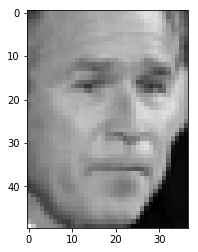

In [10]:
plt.imshow(images[0],cmap='gray')
print(target_names[target[0]])

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# 使用交叉验证来选择模型（看评分是否稳定）
from sklearn.model_selection import cross_val_score,KFold

In [15]:
def select_good_model(model,data,target):
    kfold = KFold(n_splits=10,)
    results = cross_val_score(model,data,target,cv=kfold)
    name = model.__class__.__name__
    print("{}算法平均评分{}，方差是{}".format(name,results.mean(),results.std()))

In [16]:
select_good_model(KNeighborsClassifier(),data,target)

KNeighborsClassifier算法平均评分0.6145915187643951，方差是0.04010632197232569


In [17]:
select_good_model(DecisionTreeClassifier(),data,target)

DecisionTreeClassifier算法平均评分0.49790678769814384，方差是0.05213356364773347


In [18]:
select_good_model(SVC(),data,target)

SVC算法平均评分0.4354559002845143，方差是0.02115062291258574


In [19]:
# 小心运行
%time select_good_model(LogisticRegression(),data,target)

LogisticRegression算法平均评分0.8438897168405364，方差是0.02034141394870609


In [ ]:
%time 测一次的运行时间  耗时长的算法
%timeit 测多次的运行时间 耗时短的算法

In [46]:
# 算法时间很长，可以通过降维技术进行处理，图片处理中，降维非常常用
from sklearn.decomposition import PCA
pca = PCA(n_components=0.98)

pca_data = pca.fit_transform(data)

In [49]:
pca_data = DataFrame(pca_data)
pca_data

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
0,374.417174,255.105381,-312.880051,538.816422,461.615642,296.207184,74.592829,209.780970,7.594877,206.696232,...,0.506051,5.067084,21.775020,-27.632750,-6.475804,-15.989539,12.463290,6.144254,7.600338,-18.320657
1,143.588438,-923.851492,-446.141159,-609.044302,254.324405,-79.080272,-320.560128,389.147875,-571.788086,166.533461,...,5.529378,-7.090517,16.482561,-26.514904,-17.435805,-12.461486,-8.531674,18.681899,22.451431,-14.645597
2,181.352435,-239.651891,-95.480659,-603.979139,186.800842,154.972500,114.464873,-238.797590,16.433102,12.070637,...,-4.800349,-7.138823,33.437609,12.965638,5.406579,35.070076,12.276092,25.992487,-0.677807,5.944022
3,1387.945865,-5.548556,310.361078,210.343930,-406.294091,-85.905653,-39.731056,204.099081,24.879203,-93.715676,...,8.998892,20.088277,-3.815690,2.295029,-6.815912,-4.923981,25.438746,-15.537323,22.831869,-14.710834
4,1148.006080,506.847285,-131.365898,-87.807016,409.164347,102.074120,-45.782783,92.542485,-527.636474,-689.968795,...,2.852321,-2.526962,-60.787047,13.638624,1.573505,9.002594,-2.252473,4.162268,11.329774,-6.591030
5,-247.145213,1010.263744,-63.920433,377.461674,-19.361531,-222.879415,-48.136602,178.812317,501.779096,179.200328,...,9.003293,-1.630920,8.034721,-38.849286,8.569921,3.479504,18.198284,1.119253,-17.896466,-15.092474
6,735.951590,1038.268963,-639.245513,-287.592673,-474.551097,798.905255,268.615346,-54.986551,76.597019,-314.989222,...,44.964153,-8.759666,-36.458048,27.940200,-3.238859,8.318819,-5.314921,-21.917813,-19.853789,14.205409
7,-1138.660966,-1218.162323,-379.150758,-539.925612,155.253793,129.880212,-651.606792,140.695061,-63.335224,-169.012629,...,-1.485335,9.415208,15.139007,-1.987534,37.392031,-5.575893,6.025363,35.745644,29.217156,-0.892769
8,1538.388633,131.601989,-178.006496,112.283082,-287.402632,-38.404822,292.958094,-8.403077,14.079285,168.202410,...,-21.563473,32.039405,-1.154043,3.108478,24.440017,14.180214,8.310213,-30.411154,-22.059703,1.113469
9,920.100117,769.265045,712.514216,-106.799692,-410.943043,519.965375,369.286094,883.432065,-142.693660,296.654469,...,0.903204,7.741440,28.535278,-23.879737,30.784974,13.135118,-10.941064,19.108998,30.897980,-3.122111


In [23]:
data.shape

(1217, 1850)

In [25]:
%time select_good_model(LogisticRegression(),pca_data,target)

LogisticRegression算法平均评分0.7634060425416609，方差是0.031976315076270426
Wall time: 2min 27s


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [53]:
# 调参
X_train,X_test,y_train,y_test = train_test_split(pca_data,target,test_size=0.2)

logistic = LogisticRegression()
parma_dic = {
    'penalty':['l1','l2'],
    'C':[0.001,0.01,0.1,1,10,100]
}
search_cv = GridSearchCV(logistic,parma_dic)
search_cv.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [62]:
search_cv.best_params_

{'C': 0.1, 'penalty': 'l1'}

In [63]:
best_logistic = search_cv.best_estimator_

best_logistic.score(X_train,y_train)

1.0

In [64]:
best_logistic.score(X_test,y_test)

0.7991803278688525

In [70]:
y_ = best_logistic.predict(X_test)

In [73]:
target_names[y_[:5]]

array(['George W Bush', 'George W Bush', 'George W Bush', 'Tony Blair',
       'Donald Rumsfeld'], dtype='<U17')

In [76]:
true_names = target_names[y_test[:5]]
true_names

array(['George W Bush', 'George W Bush', 'George W Bush',
       'Gerhard Schroeder', 'Donald Rumsfeld'], dtype='<U17')

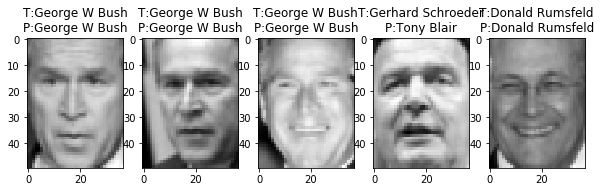

In [77]:
# 展示预测结果
test_faces = images[X_test.index[:5]]
results = target_names[y_[:5]]
true_names = target_names[y_test[:5]]
plt.figure(figsize=(10,4))
for i in range(5):
    test_face = test_faces[i]
    axes = plt.subplot(1,5,i+1)
    title = "T:{}\nP:{}".format(true_names[i],results[i])
    axes.imshow(test_face,cmap='gray')
    axes.set_title(title)